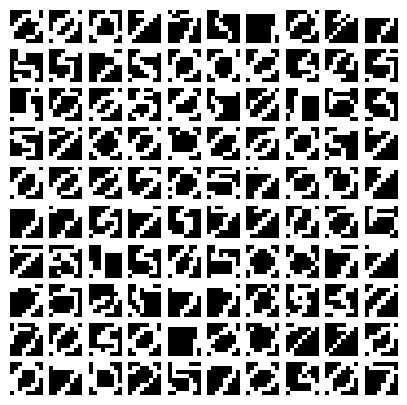

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def load_binarydigits(filename='binarydigits.txt'):
    Y = np.loadtxt('binarydigits.txt')
    return Y

def save_data_binary(Y: np.ndarray, save=False):
    N, _ = Y.shape
    plt.figure(figsize=(5, 5))
    for n in range(N):
        plt.subplot(10, 10, n+1)
        plt.imshow(np.reshape(Y[n, :], (8,8)),
                   interpolation="None",
                   cmap='gray')
        plt.axis('off')
    if save:
            plt.savefig('data_binary.png', format="png", dpi=300, bbox_inches="tight")
    plt.show()

### ML Parameter Learning

In [ ]:
def ML_learning(Y: np.ndarray, save_ML = False):
    N, D = Y.shape
    p_ML = np.zeros((D, 1), dtype=np.float64)
    
    for d in range(D):
        p_ML[d] = (1/N)*np.sum(Y[:, d])
    
    p_ML_image = np.reshape(p_ML, (8,8))
    plt.figure()
    plt.imshow(p_ML_image, cmap="hot", interpolation='nearest')
    plt.colorbar(label='Probability') 
    plt.title('Optimal ML Parameter for Pixels')
    for i in range(8):
        for j in range(8):
            if p_ML_image[i,j] > 0.15:
                plt.text(j, i, f"{p_ML_image[i, j]:.2f}", ha='center', va='center', color="black")
            else:
                plt.text(j, i, f"{p_ML_image[i, j]:.2f}", ha='center', va='center', color="white")
    if save_ML:
        plt.savefig('ML_parameter.png', format="png", dpi=300, bbox_inches="tight")
    plt.show()

    return p_ML_image, p_ML

In [25]:
def MAP_learning(Y: np.ndarray, save_MAP=False):
    N, D = Y.shape
    alpha = 3
    beta = 3
    
    p_MAP = np.zeros((D, 1), dtype=np.float64)
    
    for d in range(D):
        p_MAP[d] = (alpha - 1 + np.sum(Y[:, d]))/(N + alpha + beta - 2)
    
    p_MAP_image = np.reshape(p_MAP, (8,8))
    
    plt.figure()
    plt.imshow(p_MAP_image, cmap="inferno", interpolation='nearest')
    plt.colorbar(label='Probability') 
    plt.title('Optimal MAP Parameter for Pixels')
    for i in range(8):
        for j in range(8):
            if p_MAP_image[i,j] > 0.15:
                plt.text(j, i, f"{p_MAP_image[i, j]:.2f}", ha='center', va='center', color="black")
            else:
                plt.text(j, i, f"{p_MAP_image[i, j]:.2f}", ha='center', va='center', color="white")
    if save_MAP:
        plt.savefig('MAP_parameter.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

    return p_MAP_image, p_MAP

In [27]:
def ML_MAP_comparison(p_ML_image, p_MAP_image, save_diff=False):
    p_diff = p_MAP_image - p_ML_image
    plt.figure()
    plt.imshow(p_diff, cmap="viridis", interpolation='nearest')
    plt.colorbar(label='Probability difference') 
    plt.title('Difference between MAP and ML estimations')
    for i in range(8):
        for j in range(8):
            if p_diff[i,j] > 0.005:
                plt.text(j, i, f"{p_diff[i, j]:.3f}", ha='center', va='center', color="black")
            else:
                plt.text(j, i, f"{p_diff[i, j]:.3f}", ha='center', va='center', color="white")
    if save_diff:
        plt.savefig('Difference_ML_MAP.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()


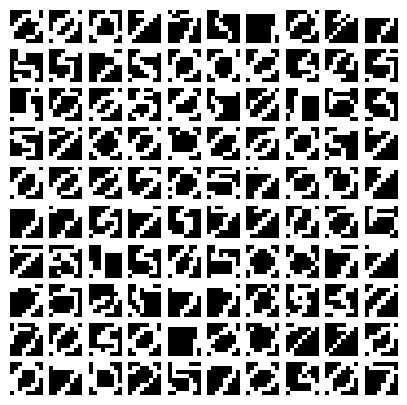

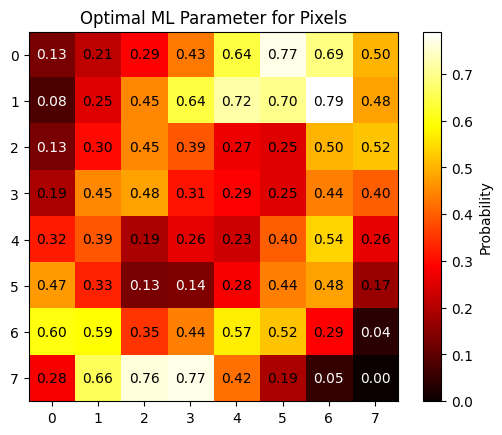

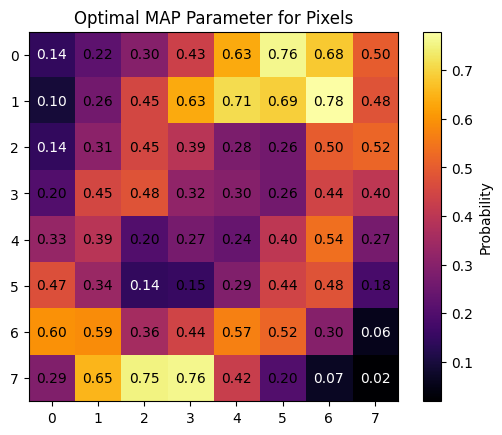

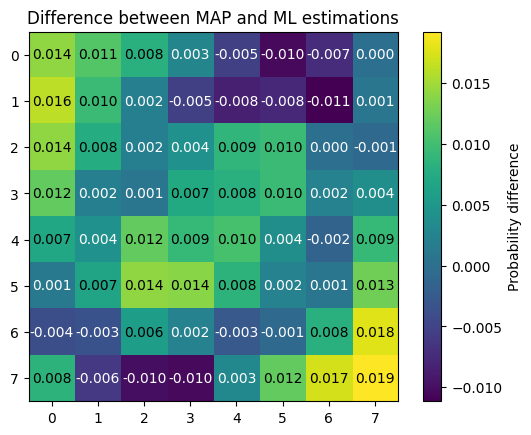

In [29]:
Y = load_binarydigits()
save_data_binary(Y)
p_ML_image, p_ML = ML_learning(Y)
p_MAP_image, p_MAP = MAP_learning(Y)
ML_MAP_comparison(p_ML_image, p_MAP_image, True)